In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self,K,max_iter):
        self.K=K
        self.max_iter = max_iter
        
    def initialize(self,X):  
        self.num_points = X.shape[0]
        self.dims = X.shape[1]
        
        self.phi = np.full(shape=self.K, fill_value=1/self.K)
        self.weights = np.zeros(X.shape)
        
        self.mu = [X[random_row,:] for random_row in random.samplr(0, len(X), self.K)]
        
        self.sigma = [np.cov(X,T) for _ in range(self.K)]
        
    def fit(self, X):
        self.initialize(X)
        
        for _ in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
def e_step(self, X):
    self.weights= self.predict_proba(X)
    self.phi = self.weights.mean(axis=0)
    
def m_step(self, X):
    for i in range(self.K):
        weights = self.weights[:,[i]]
        total_weights = weights.sum()
        self.mu[i] = (X * weight).sum(axis=0)/ total_weight
        self.sigma[i] = np.cov(X.T, aweight=(weight/total_weight).flatten(), bias=True)
        
def predict_proba(self, X):
    likelihood = np.zeros((len(X), self.K))
    for i in range(self.K):
        
        distribution = multivariate_normal(mean=self.mu[i], cov=self.sigma[i])
        likelihood[:,i] = distribution.pdf(X)
        
    numerator = likelihood*self.phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weight = numerator/ denominator
    return weight
        

In [3]:
gmm = GMM(K=2, max_iter=100)

In [4]:
from sklearn import datasets
myiris = datasets.load_iris()
X = myiris.data

In [8]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=2)
gmm.fit(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2)

In [9]:
probabilities=gmm.predict_proba(X)

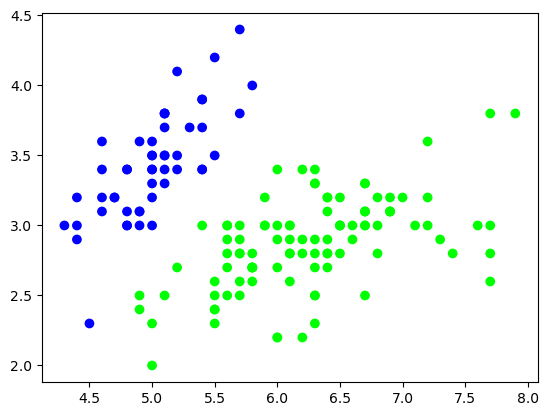

In [49]:
plt.scatter([i[0] for i in X], [i[1] for i in X], color=[(0,i[0], i[1]) for i in probabilities])
plt.show()